In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import multiprocessing
import seaborn as sns
import pandas as pd
import numpy as np


In [78]:
data = pd.read_csv('Taller_1\Bases\heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [79]:
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']

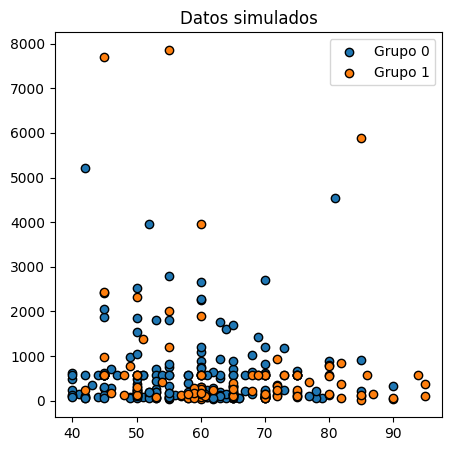

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i]['age'],
        y = X[y == i]['creatinine_phosphokinase'],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados')
ax.legend();

In [81]:
modelo_1 = MLPClassifier(
                hidden_layer_sizes=(5),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_2 = MLPClassifier(
                hidden_layer_sizes=(10),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 1000,
                random_state = 123
            )

modelo_3 = MLPClassifier(
                hidden_layer_sizes=(20, 20),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_4 = MLPClassifier(
                hidden_layer_sizes=(50, 50, 50),
                learning_rate_init=0.01,
                solver = 'lbfgs',
                max_iter = 5000,
                random_state = 123
            )

modelo_1.fit(X=X, y=y)
modelo_2.fit(X=X, y=y)
modelo_3.fit(X=X, y=y)
modelo_4.fit(X=X, y=y)

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\j

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

In [82]:
param_grid = {
    'hidden_layer_sizes': [
        (5,),
        (10,),
        (15,),
        (25,),
        (50,),
        (5, 5),
        (10, 10),
        (15, 5),
        (25, 10),
        (20, 20),
        (50, 25),
        (5, 5, 5)
    ]
}

In [ ]:
grid = GridSearchCV(
        estimator = MLPClassifier(
                        learning_rate_init=0.01,
                        solver = 'lbfgs',
                        alpha  = 0,
                        max_iter = 5000,
                        random_state = 123
                    ),
        param_grid = param_grid,
        scoring    = 'accuracy',
        cv         = 5,
        refit      = True,
        return_train_score = True
      )

_ = grid.fit(X, y)

Text(0.5, 1.0, 'Error de validacion cruzada')

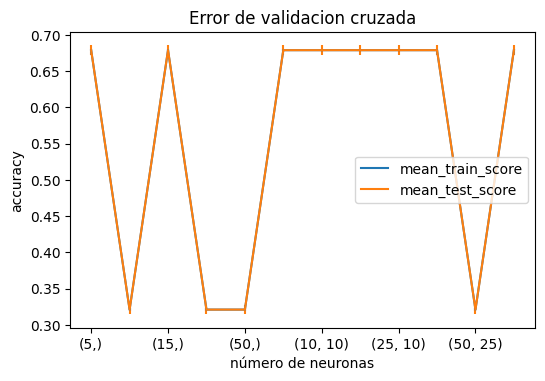

In [84]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada')

In [88]:
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.011084,0.004023,0.004743,0.003081,"(5,)","{'hidden_layer_sizes': (5,)}",0.666667,0.683333,0.683333,0.683333,...,0.678927,0.006473,1,0.682008,0.677824,0.677824,0.677824,0.679167,0.67893,0.001625
1,0.011411,0.004430,0.003950,0.006054,"(10,)","{'hidden_layer_sizes': (10,)}",0.333333,0.316667,0.316667,0.316667,...,0.321073,0.006473,9,0.317992,0.322176,0.322176,0.322176,0.320833,0.32107,0.001625
2,0.016431,0.001780,0.004019,0.006054,"(15,)","{'hidden_layer_sizes': (15,)}",0.666667,0.683333,0.683333,0.683333,...,0.678927,0.006473,1,0.682008,0.677824,0.677824,0.677824,0.679167,0.67893,0.001625
3,0.021590,0.007619,0.002201,0.002910,"(25,)","{'hidden_layer_sizes': (25,)}",0.333333,0.316667,0.316667,0.316667,...,0.321073,0.006473,9,0.317992,0.322176,0.322176,0.322176,0.320833,0.32107,0.001625
4,0.027081,0.000796,0.001444,0.001390,"(50,)","{'hidden_layer_sizes': (50,)}",0.333333,0.316667,0.316667,0.316667,...,0.321073,0.006473,9,0.317992,0.322176,0.322176,0.322176,0.320833,0.32107,0.001625
5,0.003962,0.002965,0.003571,0.003021,"(5, 5)","{'hidden_layer_sizes': (5, 5)}",0.666667,0.683333,0.683333,0.683333,...,0.678927,0.006473,1,0.682008,0.677824,0.677824,0.677824,0.679167,0.67893,0.001625
6,0.014196,0.001766,0.003791,0.003168,"(10, 10)","{'hidden_layer_sizes': (10, 10)}",0.666667,0.683333,0.683333,0.683333,...,0.678927,0.006473,1,0.682008,0.677824,0.677824,0.677824,0.679167,0.67893,0.001625
7,0.030224,0.002971,0.002518,0.002270,"(15, 5)","{'hidden_layer_sizes': (15, 5)}",0.666667,0.683333,0.683333,0.683333,...,0.678927,0.006473,1,0.682008,0.677824,0.677824,0.677824,0.679167,0.67893,0.001625
8,0.016760,0.003181,0.001333,0.002188,"(25, 10)","{'hidden_layer_sizes': (25, 10)}",0.666667,0.683333,0.683333,0.683333,...,0.678927,0.006473,1,0.682008,0.677824,0.677824,0.677824,0.679167,0.67893,0.001625
9,0.018139,0.006744,0.004732,0.006272,"(20, 20)","{'hidden_layer_sizes': (20, 20)}",0.666667,0.683333,0.683333,0.683333,...,0.678927,0.006473,1,0.682008,0.677824,0.677824,0.677824,0.679167,0.67893,0.001625


In [85]:
scores[['mean_test_score', 'mean_train_score']]

,mean_test_score,mean_train_score
0,0.678927,0.67893
1,0.321073,0.32107
2,0.678927,0.67893
3,0.321073,0.32107
4,0.321073,0.32107
5,0.678927,0.67893
6,0.678927,0.67893
7,0.678927,0.67893
8,0.678927,0.67893
9,0.678927,0.67893


In [86]:
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

grid = RandomizedSearchCV(
        estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
        param_distributions = param_distributions,
        n_iter     = 50, # Número máximo de combinaciones probadas
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 3,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X, y = y)

resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

C:\Users\juano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
27,0.01,"(20, 20)",100.0,0.689024,0.012761,0.702261,0.033756
4,0.01,"(20, 20)",10.0,0.685657,0.008000,0.688928,0.014900
17,0.01,10,0.01,0.682290,0.003238,0.680595,0.003115
16,0.1,"(10, 10)",0.001,0.678923,0.001524,0.678928,0.000758
31,0.001,"(10, 10)",100.0,0.678923,0.001524,0.678928,0.000758
39,0.01,"(20, 20)",0.01,0.678923,0.001524,0.678928,0.000758
41,0.001,10,10.0,0.678923,0.001524,0.678928,0.000758
26,0.001,"(20, 20)",0.001,0.678923,0.001524,0.678928,0.000758
23,0.1,"(20, 20)",100.0,0.678923,0.001524,0.678928,0.000758
21,0.1,"(20, 20)",10.0,0.678923,0.001524,0.678928,0.000758


In [87]:
modelo = grid.best_estimator_
modelo

MLPClassifier(alpha=100.0, hidden_layer_sizes=(20, 20), learning_rate_init=0.01,
              max_iter=2000, solver='lbfgs')